# A Gaussian toolbox

### Gaussian manipulations made simple

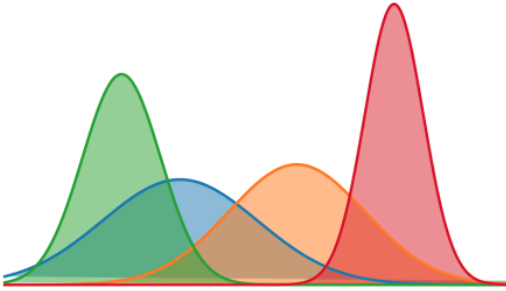

# Outline

### 1. Python toolbox for _Gaussian algebra_

<img src="images/gauss.jpeg" width="400" height="100">


### 2. Simple applications

<img src="images/regression.png" width="400" height="100">

### 3. Time-series models

<img src="images/timeseries.png" width="300" height="100">

# 1. Python toolbox for _Gaussian algebra_

<img src="images/gauss.jpeg" width="400" height="200">

# Why are Gaussians so nice?

### Analytical tractability

+ Normalization
+ Conditioning
+ Marginalization
+ Integration
+ Conjugacy

### Applications

+ Bayesian Linear Regression
+ Timeseries models: Kalman filter
+ Gaussian process
+ etc...

$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bnu}{\boldsymbol{\nu}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\diff}{\mathrm{d}}$

# The Gaussian hierarchy


### ```Gaussian density``` $\subset$ ```Gaussian Measure``` $\subset$ ```Gaussian conjugate factor```


## 1. Conjugate Gaussian Factor:

$$
u(\bx) = \exp\left(-\frac{1}{2}\bx^\top\Lambda \bx + \bx^\top\bnu + \ln \beta\right)
$$

#### Nomenclature:
+ $\Lambda\in \RR^{d\times d}$ p.s.d. matrix
+ $\bnu\in \RR^d$
+ $\ln\beta\in \RR$

#### Properties

+ Conjugacy:
$$
u_{12}(\bx) = u_{1}(\bx)u_{2}(\bx) 
$$

In [29]:
import sys
sys.path.append('../')
from jax import numpy as jnp
from matplotlib import pyplot as plt
import objax
from IPython.display import clear_output
import time
from tqdm import tqdm

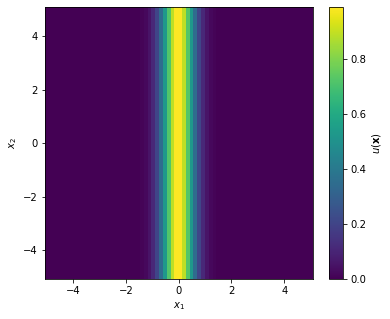

In [2]:
from src_jax import factors

# Create plot grid
reso = 70
xrange = jnp.linspace(-5,5,reso)
xmesh, ymesh = jnp.meshgrid(xrange, xrange)
X = jnp.vstack([xmesh.flatten(), ymesh.flatten()]).T

# Define terms for factor
Lambda_u = jnp.array([[[5,0],
                       [0,0]]])
nu_u = jnp.array([[0,0]])
ln_beta_u = jnp.array([0,])

# Create factor u(x)
u_x = factors.ConjugateFactor(Lambda=Lambda_u, nu=nu_u, ln_beta=ln_beta_u)
u_x_eval = u_x.evaluate(X)

# Plotting
plt.figure(figsize=(6,5))
plt.pcolor(xrange, xrange, u_x_eval.reshape((reso,reso)), shading='nearest')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar(label='$u(\mathbf{x})$')
plt.show()

## 2. Gaussian Measure:

$$
\phi(\bx) = \exp\left(-\frac{1}{2}\bx^\top\Lambda \bx + \bx^\top\bnu + \ln \beta\right)
$$

#### Nomenclature:
+ __$\Lambda\in \RR^{d\times d}$ p.d. matrix__
+ $\bnu\in \RR^d$
+ $\ln\beta\in \RR$

#### Properties

+ Properties of the Gaussian factor
+ Conjugacy:
$$
\tilde{\phi}(\bx) = u(\bx)\phi(\bx) 
$$
+ Integrable:
$$
\int \diff \phi(\bx) > 0
$$
+ Analytical solutions
$$
\int f(\bx)\diff \phi(\bx)
$$
where $f$ can be 
 + Conjugate Gaussian Factors
 + polynomials $(A\bx + \mathbf{a})^\top(B\bx + \mathbf{b})...$ (see [Isserlis' theorem](https://en.wikipedia.org/wiki/Isserlis%27_theorem))
 + and also other functions (see [list of Gaussian integrals](https://en.wikipedia.org/wiki/List_of_integrals_of_Gaussian_functions))

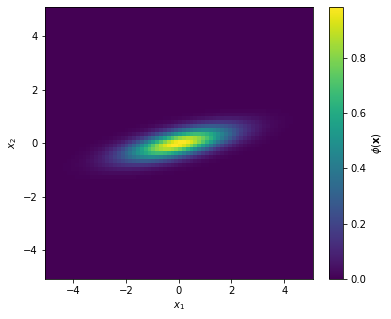

In [3]:
from src_jax import measures

# Defines terms for measure
Lambda_phi = jnp.array([[[1., -2.],
                         [-2., 10.]]])
nu_phi = jnp.array([[0, 0]])
ln_beta_phi = jnp.array([0,])

# Creates measure
phi_x = measures.GaussianMeasure(Lambda=Lambda_phi, nu=nu_phi, ln_beta=ln_beta_phi)
phi_x_eval = phi_x.evaluate(X)


plt.figure(figsize=(6,5))
plt.pcolor(xrange, xrange, phi_x_eval.reshape((reso,reso)), shading='nearest')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar(label='$\phi(\mathbf{x})$')
plt.show()

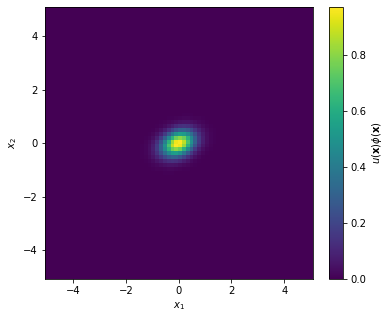

In [4]:
u_phi_x = phi_x.multiply(u_x)
u_phi_x_eval = u_phi_x.evaluate(X)
plt.figure(figsize=(6,5))
plt.pcolor(xrange, xrange, u_phi_x_eval.reshape((reso,reso)), shading='nearest')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar(label='$u(\mathbf{x})\phi(\mathbf{x})$')
plt.show()

In [9]:
# phi_x.integrate() # \int dphi(x)
# phi_x.integrate('x') # \int x dphi(x)
# phi_x.integrate('xx') # \int xx' dphi(x)
# phi_x.integration_dict.keys()

## 3. Gaussian Density

$$
p(\bx) = \exp\left(-\frac{1}{2}\bx^\top\Lambda \bx + \bx^\top\bnu + \ln \beta\right) = \frac{1}{Z}\exp\left(-\frac{1}{2}(\bx-\bmu)^\top\Sigma^{-1} (\bx-\bmu)\right) \text{ s.t. } \int\diff p(\bx) \stackrel{!}{=} 1
$$

#### Nomenclature:
+ $\Sigma=\Lambda^{-1}$
+ $\bmu=\Sigma\bnu$
+ $\ln\beta= -\frac{1}{2}\ln |2\pi\Lambda^{-1}| -\frac{1}{2}\bnu^\top\Lambda^{-1}\bnu\Leftrightarrow \ln Z = \frac{1}{2}\ln |2\pi\Sigma|$

#### Properties

+ Properties of the Gaussian measure (Note: $\phi(\bx)=u(\bx)p(\bx)$!)
+ Probability measure
+ Marginalization is analytical
+ Integrals become meaningful
 + Mean: $\bmu = \EE[\bx] = \int\bx \diff p(\bx)$
 + Variance: $\Sigma = \EE[(\bx-\bmu)(\bx-\bmu)^\top] = \int(\bx-\bmu)(\bx-\bmu)^\top\diff p(\bx)$
+ Conditioning...

In [10]:
from src_jax import densities

p_x = phi_x.get_density()
integal_phi = p_x.integrate()
print('Intergrating over density = %d. (Hurray!!!)' %integal_phi)

Intergrating over density = 1. (Hurray!!!)


### Sampling (not a priority of this package!)

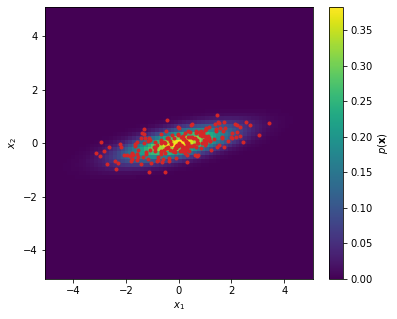

In [11]:
p_x_samples = p_x.sample(200)
p_x_eval = p_x.evaluate(X)

plt.figure(figsize=(6,5))
plt.pcolor(xrange, xrange, p_x_eval.reshape((reso,reso)), shading='nearest')
plt.plot(p_x_samples[:,:,0], p_x_samples[:,:,1], 'C3.')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.colorbar(label='$p(\mathbf{x})$')
plt.show()

### Marginalization

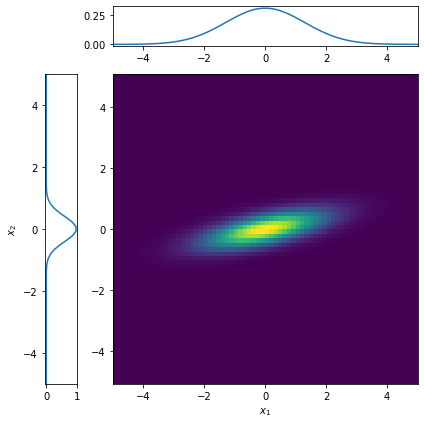

In [12]:
p_x1 = p_x.get_marginal(dim_x=jnp.array([0]))
p_x2 = p_x.get_marginal(dim_x=jnp.array([1]))
x = jnp.array([xrange]).T

# Plotting
from matplotlib import gridspec
fig = plt.figure(figsize=(6,6))
grid = gridspec.GridSpec(6,6,fig)
ax1 = fig.add_subplot(grid[1:,:1])
ax1.plot(p_x2.evaluate(x).T, x)
ax1.set_ylim(x[jnp.array([0,-1]), 0])
ax1.set_ylabel('$x_2$')
ax2 = fig.add_subplot(grid[:1,1:])
ax2.plot(x,p_x1.evaluate(x).T)
ax2.set_xlim([-5,5])
ax1.set_ylim(x[jnp.array([0,-1]), 0])
ax3 = fig.add_subplot(grid[1:,1:])
ax3.pcolor(xrange, xrange, p_x_eval.reshape((reso,reso)), shading='nearest')
ax3.set_xlabel('$x_1$')
ax3.set_xlim([-5,5])
plt.tight_layout()

|   |  `Factor` | `Measure` | `Density` |
|---|---|---|---|
| __Conjugacy__ | &check; | &check;  | &check; |
| __Integrable__  | &cross; | &check;  | &check;  |
| __Normalized__  | &cross; | &cross;  | &check;  |

## 4. The missing piece: Gaussian conditionals

$$
p(\by\vert\bx) = \frac{1}{Z(\bx)}\exp\left(-\frac{1}{2}(\by-\bmu(\bx))^\top\Sigma(\bx)^{-1} (\by-\bmu(\bx)) \right)  \text{ s.t. } \int\diff p(\by\vert\bx) \stackrel{!}{=} 1
$$

### Linear model

+ $\bmu(\bx) = M\bx + \mathbf{b}$
+ $\Sigma(\bx) = \Sigma$

### Tractable affine tranformations

+ Joint transformation: $T_{\rm joint}[p(\by|\bx),p(\bx)] = p(\bx,\by)$
+ Marginal transformation: $T_{\rm marg}[p(\by|\bx),p(\bx)] = p(\by)$
+ Conditional transformation: $T_{\rm cond}[p(\by|\bx),p(\bx)] = p(\bx\vert\by)$

### Caution:

A _conditional density_ $p(\by\vert \bx)$ becomes only something concrete if $\bx$ is defined, either through a concrete value, or a density $p(\bx)$.

In [13]:
from src_jax import conditionals
# Conditioning
p_x0_given_x1 = p_x.condition_on(jnp.array([1])) # p(x0|x1) = p(x0,x1)/p(x1)
p_x0_given_x1

In [14]:
# Get density conditioned on a specific point
cond_x1 = jnp.ones((1,1))
p_x0_given_x1_cond = p_x0_given_x1.condition_on_x(cond_x1)
p_x0_given_x1_cond

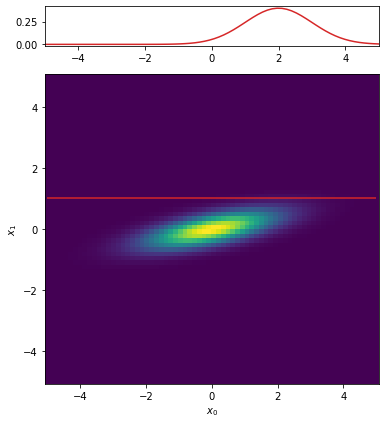

In [15]:
p_x0_given_x1_cond_eval = p_x0_given_x1_cond.evaluate(x)

# Plotting
fig = plt.figure(figsize=(6,6))
grid = gridspec.GridSpec(6,6,fig)
ax2 = fig.add_subplot(grid[:1,1:])
ax2.plot(x, p_x0_given_x1_cond_eval.T, 'C3')
ax2.set_xlim(x[jnp.array([0,-1]), 0])
ax3 = fig.add_subplot(grid[1:,1:])
ax3.hlines(cond_x1, xrange[0], xrange[-1], 'C3')
ax3.pcolor(xrange, xrange, p_x_eval.reshape((reso, reso)), shading='nearest')
ax3.set_xlabel('$x_0$')
ax3.set_ylabel('$x_1$')
plt.tight_layout()

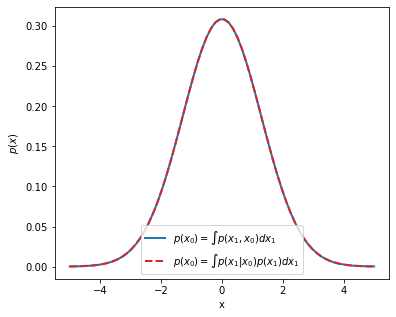

In [18]:
p_x_marg0 = p_x.get_marginal(jnp.array([0])) # p(x0) = \int p(x0,x1)dx1
p_x_marg1 = p_x.get_marginal(jnp.array([1])) # p(x1) = \int p(x0,x1)dx0
p_x_marg0_cond = p_x0_given_x1.affine_marginal_transformation(p_x_marg1) # p(x0) \int p(x1|x0)p(x1) dx1
# Get density conditioned on a specific point
plt.figure(figsize=(6,5))
plt.plot(x, p_x_marg0.evaluate(x)[0], lw=2, label='$p(x_0) = \int p(x_1,x_0) dx_1$')
plt.plot(x, p_x_marg0_cond.evaluate(x)[0], 'C3--', lw=2, label='$p(x_0) = \int p(x_1|x_0)p(x_1) dx_1$')
plt.xlabel('x')
plt.ylabel('$p(x)$')
plt.legend()

# 2. Simple applications

<img src="images/regression.png" width="400" height="100">

# Let's do something practical: Linear Regression

### Generate some data

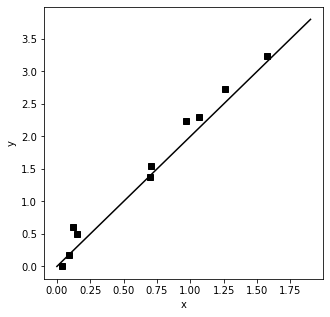

In [19]:
sigma_y = 0.2
D = 1
N = 10

x_range = jnp.array([jnp.arange(0,2,.1)]).T
X = 2 * objax.random.uniform((N, D))
w = 2 * jnp.ones((D,))
b = 0 * jnp.zeros((1,))
y = jnp.dot(X, w) + b + sigma_y * objax.random.normal((N,))
y = jnp.array([y]).T
y_range = jnp.dot(x_range, w) + b 

plt.figure(figsize=(5,5))
plt.plot(X, y, 'ks')
plt.plot(x_range, y_range, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This affine transformations are all you need for inference:

### Bayes rule

$$
 p(w\vert D) = \frac{p(D\vert w)p(w)}{p(D)}.
$$

where $D$ is data and $w$ parameters.

You start with _likelihood_ $p(D\vert w)$ and _prior_ $p(w)$
+ Joint transformation $p(D, w) = T_{\rm joint}[p(D|w),p(w)]$ to get _joint likelihood_.
+ Marginal transformation $p(D) = T_{\rm marg}[p(D|w),p(w)]$ to get _marginal likelihood_.
+ Conditional transformation $p(w\vert D) = T_{\rm cond}[p(D|w),p(w)]$ to get _posterior_.

## Construct the building blocks

In [20]:
from src_jax import densities, conditionals
sigma_y = 0.1
mu_prior = 0
sigma_prior = 1.0

# Construct prior
Sigma = jnp.array([sigma_prior ** 2.0 * jnp.eye(D)])
mu = mu_prior * jnp.ones((1, D))

prior = densities.GaussianDiagDensity(Sigma=Sigma, mu=mu) # p(W)

# Construct likelihood
Sigma_lk = jnp.ones((N, 1, 1)) * sigma_y ** 2
M_lk = X[:, None]
likelihood_term = conditionals.ConditionalGaussianDensity(M=M_lk, Sigma=Sigma_lk) # p(Y_i| X=x_i, W)

## Now let's put them together!

### Sequential update

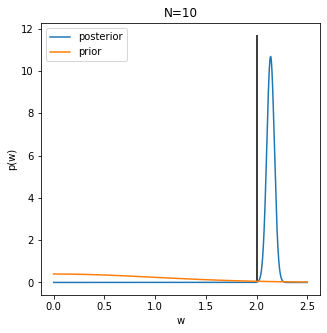

In [24]:
posterior = prior
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
w_range = jnp.array([jnp.arange(0,2.5,.001)]).T
ax1.plot(w_range[:,0], posterior.evaluate(w_range)[0], label='posterior')
ax1.plot(w_range[:,0], prior.evaluate(w_range)[0], label='prior')
ax1.vlines(w,0,jnp.amax(posterior.evaluate(w_range)[0]) + 1, 'k')
ax1.set_xlabel('w')
ax1.set_ylabel('p(w)')
ax1.set_title('N=0')
plt.legend()
plt.show()


for i in range(N):
    # Updating posterior
    lk_i = likelihood_term.slice(jnp.array([i]))
    posterior_y = lk_i.affine_conditional_transformation(posterior)
    posterior = posterior_y.condition_on_x(y[i:i+1])
    
    # just plotting
    clear_output(wait=True)
    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111)
    time.sleep(1.)
    ax1.cla()
    ax1.plot(w_range[:,0], posterior.evaluate(w_range)[0], label='posterior')
    ax1.plot(w_range[:,0], prior.evaluate(w_range)[0], label='prior')
    ax1.vlines(w,0,jnp.amax(posterior.evaluate(w_range)[0]) + 1, 'k')
    ax1.set_xlabel('w')
    ax1.set_ylabel('p(w)')
    ax1.set_title('N=%d' %(i+1))
    plt.legend()
    plt.show()

### Update in one go

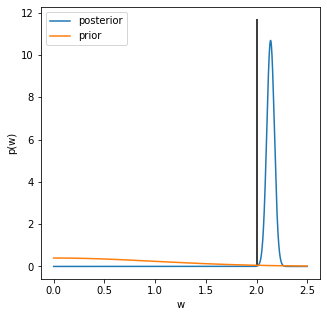

In [25]:
# Inference
# Fill in data
likelihood = likelihood_term.set_y(y) # p(Y=y_i| X=x_i, W)
likelihood = likelihood.product() # p(Y=y| X=x, W)
posterior_measure = prior.multiply(likelihood) # p(W, Y=y| X=x) = p(Y=y| X=x, W)p(W)
posterior = posterior_measure.get_density() # p(W| Y=y, X=x)

plt.figure(figsize=(5,5))
plt.plot(w_range[:,0], posterior.evaluate(w_range)[0], label='posterior')
plt.plot(w_range[:,0], prior.evaluate(w_range)[0], label='prior')
plt.vlines(w,0,jnp.amax(posterior.evaluate(w_range)[0]) + 1, 'k')
plt.xlabel('w')
plt.ylabel('p(w)')
plt.legend()
plt.show()

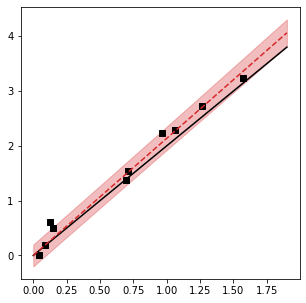

In [26]:
# Prediction
X_star = x_range
N_star = X_star.shape[0]
M = jnp.reshape(X_star, (N_star, 1, X_star.shape[1]))
b = jnp.zeros((N_star, 1))
Sigma = sigma_y ** 2.0 * jnp.ones((N_star, 1, 1))
likelihood_measure = conditionals.ConditionalGaussianDensity(M=M, b=b, Sigma=Sigma)
prediction_density = likelihood_measure.affine_marginal_transformation(posterior)

plt.figure(figsize=(5,5))
plt.plot(X, y, 'ks')
plt.plot(x_range, y_range, 'k')
plt.plot(X_star, prediction_density.mu, 'C3--')
plt.fill_between(X_star[:,0], prediction_density.mu[:,0] - 2 * jnp.sqrt(prediction_density.Sigma[:,0,0]),
                              prediction_density.mu[:,0] + 2 * jnp.sqrt(prediction_density.Sigma[:,0,0]),
                alpha=.3, color='C3')

# Let's get (a bit) more fancy

## Combining neural nets and Gaussians

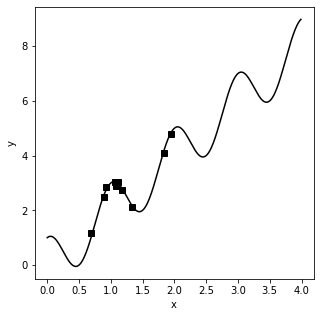

In [27]:
sigma_y = 0.1
D = 1
N = 10

f = lambda x: jnp.cos(2 * jnp.pi * x) + 2 * x

x_range = jnp.array([jnp.arange(0,4,.01)]).T
X = 2 * objax.random.uniform((N, D))
w = 2 * jnp.ones((D,))
y = f(X[:,0]) + sigma_y * objax.random.normal((N,))
y = jnp.array([y]).T
y_range = f(x_range)

plt.figure(figsize=(5,5))
plt.plot(X, y, 'ks')
plt.plot(x_range, y_range, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Conditional density with control variables

$$
p(\by\vert\bx,u) = \frac{1}{Z(\bx)}\exp\left(-\frac{1}{2}(\by-\bmu(\bx,u))^\top\Sigma(\bx)^{-1} (\by-\bmu(\bx,u)) \right)  \text{ s.t. } \int\diff p(\by\vert\bx) \stackrel{!}{=} 1
$$

### Linear model

+ $\bmu(\bx) = M(u)\bx + \mathbf{b}(u)$
+ $\Sigma(\bx) = \Sigma$

$u$ are control variables


In [30]:
from src_jax import densities, conditionals

sigma_y = 0.1
mu_prior = 0
sigma_prior = 1.0

# Construct prior
Sigma = jnp.array([sigma_prior ** 2.0 * jnp.eye(D)])
mu = mu_prior * jnp.ones((1, D))
prior = densities.GaussianDiagDensity(Sigma=Sigma, mu=mu) # p(W)

# Construct likelihood
Sigma_lk = jnp.ones((1, 1, 1)) * sigma_y ** 2
likelihood_term = conditionals.NNControlGaussianConditional(Sigma=Sigma_lk, Dx=1, Du=D) # p(Y_i| X=x_i, W)

def get_neg_log_marginal_llk(X,y):
    likelihood_term_set_X = likelihood_term.set_control_variable(X)
    likelihood = likelihood_term_set_X.set_y(y).product()
    posterior_measure = prior.hadamard(likelihood)
    return -posterior_measure.log_integral().squeeze()

100%|██████████| 50000/50000 [00:07<00:00, 6746.28it/s]


Text(0, 0.5, 'Neg. marginal likelihood')

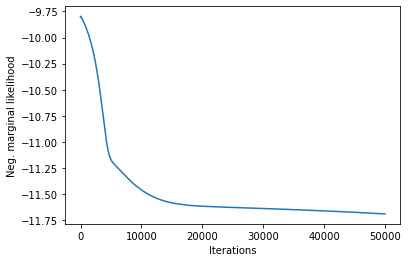

In [32]:
opt = objax.optimizer.Adam(likelihood_term.vars())

gv = objax.GradValues(get_neg_log_marginal_llk, likelihood_term.vars())
lr = 1e-4

def train_op(X, y):
    g, v = gv(X, y)  # returns gradients, loss
    opt(lr, g)
    return v

# This line is optional: it is compiling the code to make it faster.
train_op = objax.Jit(train_op, gv.vars() + opt.vars())

loss = []
for i in tqdm(range(50000)):
    loss.append(train_op(X,y))
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Neg. marginal likelihood')

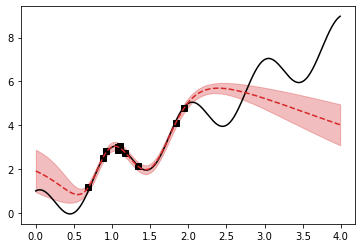

In [33]:
likelihood_term_set_X = likelihood_term.set_control_variable(X)
likelihood = likelihood_term_set_X.set_y(y).product()
posterior_measure = prior.hadamard(likelihood)
posterior = posterior_measure.get_density()

likelihood_term_set_X_new = likelihood_term.set_control_variable(x_range)
prediction_density = likelihood_term_set_X_new.affine_marginal_transformation(posterior)

plt.plot(X, y, 'ks')
plt.plot(x_range, y_range, 'k')
plt.plot(x_range, prediction_density.mu, 'C3--')
plt.fill_between(x_range[:,0], prediction_density.mu[:,0] - 2 * jnp.sqrt(prediction_density.Sigma[:,0,0]),
                              prediction_density.mu[:,0] + 2 * jnp.sqrt(prediction_density.Sigma[:,0,0]),
                alpha=.3, color='C3')
plt.show()

# 3. Time-series models

<img src="images/timeseries.png" width="300" height="100">

# Another classic application: The Kalman Filter

Here we use the Gaussian Toolbox to implement a Kalman filter which has the form

$$
\color{red}{z_{t} = A z_{t-1} + b + \zeta_t} \\
\color{blue}{x_{t} = C z_t + d + \xi_t},
$$

where $x_t$ are our observations and $z_t$ latent (unobserved) variables. Furthermore, the noise variables are

$$
\color{red}{\zeta_t \sim N(0,Q_z)}\\
\color{blue}{\xi_t \sim N(0,Q_x)}.
$$

Hence, our model is composed by a $\color{red}{\text{state model}}$ and an $\color{blue}{\text{emission- or observation model}}$.

The joint likelihood is given by

$$
p(z_{0:T}, x_{1:T}\vert w) = p(z_0\vert w)\prod_{t=0}^{T-1} \color{blue}{p(x_{t}\vert z_{t}, w)}\color{red}{p(z_{t}\vert z_{t-1}, w)}.
$$


### Filter procedure:

Assume that you have the estimate for $\color{darkorange}{p(z_t\vert x_{1:t})}$.

+ Prediction step:

$$
 \color{green}{p(z_{t+1}\vert x_{1:t})} = \int \color{red}{p(z_{t+1}|z_t)}\color{darkorange}{p(z_t\vert x_{1:t})}\diff z_t
$$

Has the form of an _affine marginal transformation_ $T_{\rm marg}[p(\by|\bx),p(\bx)] = p(\by)$.

+ Filter step:

$$
 \color{darkorange}{p(z_{t+1}\vert x_{t+1}, x_{1:t})} = \frac{\color{blue}{p(x_{t+1}|z_{t+1})}\color{green}{p(z_{t+1}\vert x_{1:t})}}{\int \color{blue}{p(x_{t+1}|z_{t+1})}\color{green}{p(z_{t+1}\vert x_{1:t})}\diff z_{t+1}}
$$


Hase the form of a _affine conditional transformation_: $T_{\rm cond}[p(\by|\bx),p(\bx)] = p(\bx\vert\by)$.

In [36]:
class KalmanFilter:
    
    def __init__(self, X: jnp.ndarray, A: jnp.ndarray, b: jnp.ndarray, Qz: jnp.ndarray, 
                 C: jnp.ndarray, d: jnp.ndarray, Qx: jnp.ndarray):
        """ This is a linear Kalman filter.
        
        :param X: numpy.ndarray [N, Dx]
            The observed data.
        :param A: numpy.ndarray [Dz, Dz]
            The state transition matrix.
        :param b: numpy.ndarray [Dz]
            The state transition offset.
        :param Qz: numpy.ndarray [Dz, Dz]
            The state covariance.
        :param C: numpy.ndarray [Dx, Dz]
            The observation matrix.
        :param d: numpy.ndarray [Dx]
            The observation offset.
        :param Qx: numpy.ndarray [Dx, Dx]
            The observation covariances. 
        """
        self.Dz, self.Dx = Qz.shape[0], Qx.shape[0]
        self.T = X.shape[0]
        self.X = X
        self.state_density = conditionals.ConditionalGaussianDensity(jnp.array([A]), jnp.array([b]), jnp.array([Qz]))
        self.observation_density = conditionals.ConditionalGaussianDensity(jnp.array([C]), jnp.array([d]), jnp.array([Qx]))
        self.prediction_density = self._setup_density()
        self.filter_density = self._setup_density()
        
    def _setup_density(self) -> densities.GaussianDensity:
        """ Initializes a density object (with uniform densities).
        """
        Sigma = jnp.tile(jnp.eye(self.Dz)[None], (self.T+1,1,1))
        Lambda = jnp.tile(jnp.eye(self.Dz)[None], (self.T+1,1,1))
        mu = jnp.zeros((self.T + 1, self.Dz))
        ln_det_Sigma = self.Dz * jnp.log(jnp.ones(self.T+1))
        return densities.GaussianDensity(Sigma, mu, Lambda, ln_det_Sigma)
        
        
    def forward_path(self):
        """ Forward iteration.
        """
        for t in tqdm(range(1, self.T+1)):
            self.prediction(t)
            self.filtering(t)
        
        
    def prediction(self, t: int):
        """ Here the prediction density is calculated.
        
        p(z_t|x_{1:t-1}) = int p(z_t|z_t-1)p(z_t-1|x_1:t-1) dz_t-1
        
        :param t: int
            Time index.
        """
        # p(z_t-1|x_{1:t-1})
        pre_filter_density = self.filter_density.slice(jnp.array([t-1]))
        # p(z_t|x_{1:t-1})
        cur_prediction_density = self.state_density.affine_marginal_transformation(pre_filter_density)
        # Write result into prediction density collection
        self.prediction_density.update(jnp.array([t]), cur_prediction_density)
        
        
    def filtering(self, t: int):
        """ Here the filtering density is calculated.
        
        p(z_t|x_{1:t}) = p(x_t|z_t)p(z_t|x_{1:t-1}) / p(x_t)
        
        :param t: int
            Time index.
        """
        # p(z_t|x_{1:t-1})
        cur_prediction_density = self.prediction_density.slice(jnp.array([t]))
        # p(z_t| x_t, x_{1:t-1})
        p_z_given_x = self.observation_density.affine_conditional_transformation(cur_prediction_density)
        # Condition on x_t
        cur_filter_density = p_z_given_x.condition_on_x(self.X[t-1:t])
        # Write result into filter density collection
        self.filter_density.update(jnp.array([t]), cur_filter_density)

In [37]:
T = 500
trange = jnp.arange(T)
Dx = 2
Dz = 2
X = jnp.empty((T,Dx))
X = X.at[:,0].set(jnp.sin(trange / 20))
X = X.at[:,1].set(jnp.sin(trange / 10))
noise_x = .2
noise_z = .1
X += noise_x * objax.random.normal(X.shape)
Qx = noise_x ** 2 * jnp.eye(Dx)
Qz = noise_z ** 2 * jnp.eye(Dz)
A, b = jnp.eye(Dz), jnp.zeros((Dz,))
C, d = jnp.eye(Dx), jnp.zeros((Dx,))

kf = KalmanFilter(X, A, b, Qz, C, d, Qx)
kf.forward_path()

100%|██████████| 500/500 [00:13<00:00, 36.26it/s]


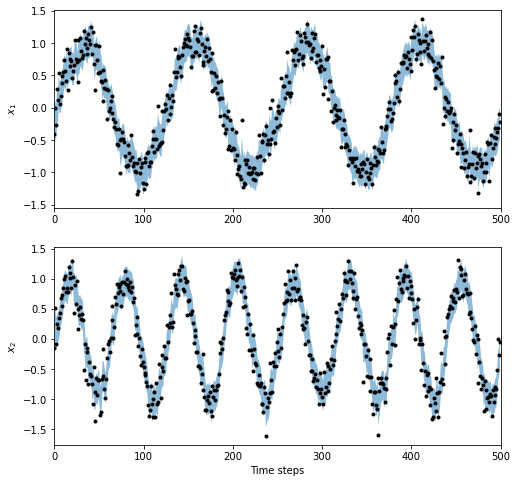

In [38]:
mean_estimate = kf.filter_density.mu
std_estimate = 2 * jnp.sqrt(kf.filter_density.Sigma.diagonal(axis1=1, axis2=2))

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
plt.plot(X[:,0], 'k.')
plt.fill_between(range(T), mean_estimate[1:,0] - std_estimate[1:,0], mean_estimate[1:,0] + std_estimate[1:,0], alpha=.5)
plt.xlim([0,500])
plt.ylabel('$x_1$')
plt.subplot(212, sharex=ax1)
plt.plot(X[:,1], 'k.')
plt.fill_between(range(T), mean_estimate[1:,1] - std_estimate[1:,1], mean_estimate[1:,1] + std_estimate[1:,1], 
                    alpha=.5)
plt.xlabel('Time steps')
plt.ylabel('$x_2$')
plt.show()

In [39]:
from timeseries_jax import observation_models, state_models, ssm_em

Dz = 2
Dx = X.shape[1]

om = observation_models.LinearObservationModel(Dx=Dx, Dz=Dz)
sm = state_models.LinearStateModel(Dz=Dz)

ssm = ssm_em.StateSpaceEM(X, om, sm)

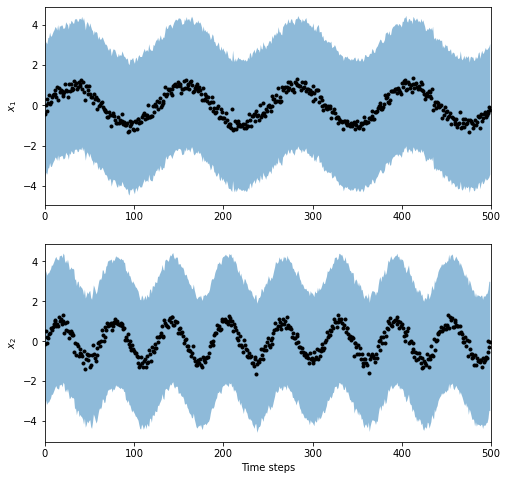

In [40]:
ssm.forward_path()
p_x = ssm.compute_data_density()
mean_estimate = p_x.mu
std_estimate = 2 * jnp.sqrt(p_x.Sigma.diagonal(axis1=1, axis2=2))

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
plt.plot(X[:,0], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,0] - std_estimate[1:,0], mean_estimate[1:,0] + std_estimate[1:,0], alpha=.5)
plt.xlim([0,500])
plt.ylabel('$x_1$')
plt.subplot(212, sharex=ax1)
plt.plot(X[:,1], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,1] - std_estimate[1:,1], mean_estimate[1:,1] + std_estimate[1:,1], 
                    alpha=.5)
plt.xlabel('Time steps')
plt.ylabel('$x_2$')
plt.show()

# Learning parameters of the model: Expectation Maximization

We do not maximize the likelihood $p(x_{1:T}\vert w)$, but the Q-function which is defined as 

$$
 Q(w,w^{\rm old}) = \EE_{p(z_{0:t}\vert x_{1:T}, w^{\rm old})}\left[\ln p(z_{0:T}, x_{1:T}\vert w)\right] \leq \ln p(x_{1:T}\vert w).
$$

This nicely decomposes into

$$
    Q(w,w^{\rm old}) = \sum_{t=1}^T\EE_{p(z_t\vert x_{1:T}, w^{\rm old})}\left[\ln \color{blue}{p(x_t\vert z_{t})}\right] + \sum_{t=1}^T\EE_{p(z_{t-1:t}\vert x_{1:T}, w^{\rm old})}\left[\ln \color{red}{p(z_t\vert z_{t-1})}\right] + \EE_{p(z_0\vert x_{1:T}, w^{\rm old})}\left[\ln p(z_0)\right].
$$

__Important observation__: $\color{blue}{\text{Observation model}}$ and $\color{red}{\text{state model}}$ are always decoupled!

In [41]:
ssm.run()

Iteration 10 - Log likelihood=-61.4
Iteration 20 - Log likelihood=-56.2
EM did converge.


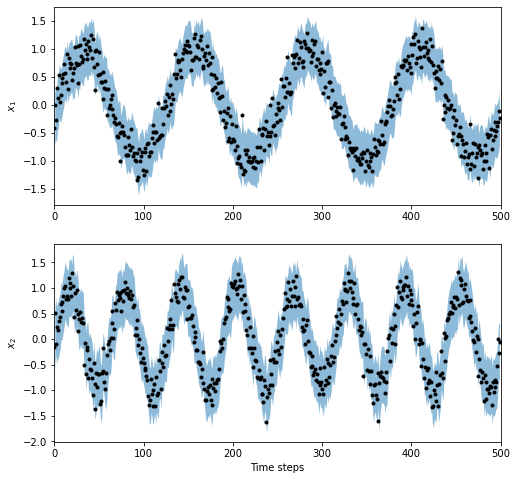

In [42]:
p_x = ssm.compute_data_density() # int p(x|z)p(z)dz
mean_estimate = p_x.mu
std_estimate = 2 * jnp.sqrt(p_x.Sigma.diagonal(axis1=1, axis2=2))

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
plt.plot(X[:,0], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,0] - std_estimate[1:,0], mean_estimate[1:,0] + std_estimate[1:,0], alpha=.5)
plt.xlim([0,500])
plt.ylabel('$x_1$')
plt.subplot(212, sharex=ax1)
plt.plot(X[:,1], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,1] - std_estimate[1:,1], mean_estimate[1:,1] + std_estimate[1:,1], 
                    alpha=.5)
plt.xlabel('Time steps')
plt.ylabel('$x_2$')
plt.show()

# Thanks for the info, but so what?!

So far, we only have seen the _Gaussian equivalent of a NN linear layer_.

Can it get a bit more interesting?

## Gaussian conditionals revisited

$$
p(\by\vert\bx) = \frac{1}{Z(\bx)}\exp\left(-\frac{1}{2}(\by-\bmu(\bx))^\top\Sigma(\bx)^{-1} (\by-\bmu(\bx)) \right)
$$

Earlier we saw a specific case, mainly the __linear model__, for which all the affine tranformations all produce Gaussians. 

For other choices this will not be the case. 

### Moment matching

Having $p(\by\vert\bx)$ and $p(\bx)$, we can approximate the joint density $p(\bx,\by)$ by a Gaussian with the correct moments.

__Mean__
$$
 \bmu_y = \EE_{p(\by)}\left[\by\right] = \EE_{p(\bx)}\left[\EE_{p(\by\vert\bx)}\left[\by\right]\right] = \EE_{p(\bx)}\left[\bmu(\bx)\right]
$$

__Variance__
$$
 \Sigma_y + \bmu_y\bmu_y^\top = \EE_{p(\by)}\left[\by\by^\top\right] = \EE_{p(\bx)}\left[\EE_{p(\by\vert\bx)}\left[\by\by^\top\right]\right] = \EE_{p(\bx)}\left[\Sigma(\bx)\right]+\EE_{p(\bx)}\left[\bmu(\bx)\bmu(\bx)^\top\right]
$$

__Covariances__
$$
 \Sigma_{xy} + \bmu_x\bmu_y^\top = \EE_{p(\bx, \by)}\left[\bx\by^\top\right] = \EE_{p(\bx)}\left[\EE_{p(\by\vert\bx)}\left[\bx\by^\top\right]\right] = \EE_{p(\bx)}\left[\bx\bmu(\bx)^\top\right]
$$

__Final joint density__
$$
p(\bx,\by) = \mathcal{N}\left(\begin{pmatrix}
                    \bmu_x\\
                    \bmu_y
                    \end{pmatrix},
                    \begin{pmatrix}
                    \Sigma_x & \Sigma_{xy} \\
                    \Sigma_{xy}^\top & \Sigma_y
                    \end{pmatrix}
                    \right)
$$

For this it is easy to compute approximations of $p(\by),$ and $p(\by\vert\bx)$, as well.

Hence, if we choose $\bmu(\bx)$ and/or $\Sigma(\bx)$ smartly, we can still use the full power of the above framework (approximately).

Examples:

Second order polynomial:
$$
\bmu(\bx) = M_{\rm 1}\bx + M_{\rm 2a}\bx\bx^\top M_{\rm 2b} + \mathbf{b}
$$

__Linear + RBF mean__:
$$
\bmu(\bx) = M_{\rm lin}\bx + M_{\rm rbf}\text{NN}_{\rm rbf}(\bx) + \mathbf{b}
$$

Let's use it as a state model.

## A non linear state model

In [43]:
from timeseries_jax import observation_models, state_models, ssm_em

Dz = 2
Dx = X.shape[1]

om = observation_models.LinearObservationModel(Dx=Dx, Dz=Dz)
#sm = state_models.LinearStateModel(Dz=Dz)
sm = state_models.LSEMStateModel(Dz=Dz, Dk=5)

ssm = ssm_em.StateSpaceEM(X, om, sm)

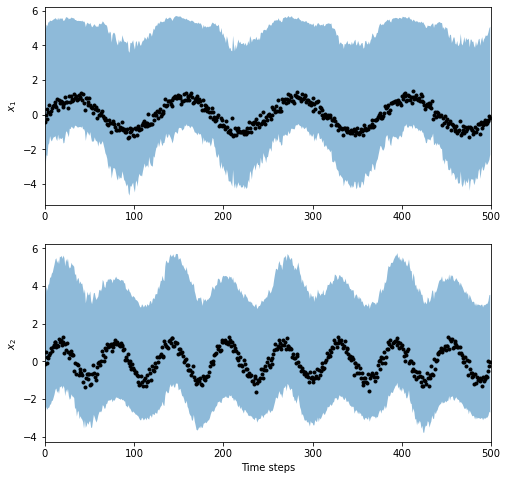

In [44]:
ssm.forward_path()
p_x = ssm.compute_data_density()
mean_estimate = p_x.mu
std_estimate = 2 * jnp.sqrt(p_x.Sigma.diagonal(axis1=1, axis2=2))

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
plt.plot(X[:,0], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,0] - std_estimate[1:,0], mean_estimate[1:,0] + std_estimate[1:,0], alpha=.5)
plt.xlim([0,500])
plt.ylabel('$x_1$')
plt.subplot(212, sharex=ax1)
plt.plot(X[:,1], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,1] - std_estimate[1:,1], mean_estimate[1:,1] + std_estimate[1:,1], 
                    alpha=.5)
plt.xlabel('Time steps')
plt.ylabel('$x_2$')
plt.show()

# Learning the parameters

Let's check the Q-function:
$$
    Q(w,w^{\rm old}) = \sum_{t=1}^T\EE_{p(z_t\vert x_{1:T}, w^{\rm old})}\left[\ln \color{blue}{p(x_t\vert z_{t})}\right] + \sum_{t=1}^T\underline{\EE_{p(z_{t-1:t}\vert x_{1:T}, w^{\rm old})}\left[\ln \color{red}{p(z_t\vert z_{t-1})}\right]} + \EE_{p(z_0\vert x_{1:T}, w^{\rm old})}\left[\ln p(z_0)\right].
$$

State model part:
$$
\EE_{p(z_{t-1:t}\vert x_{1:T}, w^{\rm old})}\left[\ln \color{red}{p(z_t\vert z_{t-1})}\right] = \EE_{p(z_{t-1:t}\vert x_{1:T}, w^{\rm old})}\left[-\frac{1}{2}\left(z_{t} - \bmu_{\rm lin+rbf}(z_{t-1})\right)^\top Q_z^{-1}\left( z_{t} - \bmu_{\rm lin+rbf}(z_{t-1})\right) - \frac{1}{2}\ln\vert Q_z\vert \right] + {\rm const.}
$$

No problem to calculate with our fancy ```density.integrate()``` function!

In [45]:
# Define terms for factor
Lambda_u = jnp.array([[[5,0],
                       [0,0]]])
nu_u = jnp.array([[0,0]])
ln_beta_u = jnp.array([0,])

# Create factor u(x)
rbf_x = factors.ConjugateFactor(Lambda=Lambda_u, nu=nu_u, ln_beta=ln_beta_u)

Sigma = jnp.array([[[1,0],
                    [0,1]]])
mu = jnp.array([[0,0]])
p_x = densities.GaussianDensity(Sigma=Sigma, mu=mu)

# Solving necessary intergrals

p_x.multiply(rbf_x).integrate()
p_x.multiply(rbf_x).multiply(rbf_x).integrate()
p_x.multiply(rbf_x).integrate('x')
p_x.integrate('xx')

DeviceArray([[[1., 0.],
              [0., 1.]]], dtype=float32)

# Hence, we can also fit this model

In [ ]:
ssm.run()

In [ ]:
ssm.forward_path()
p_x = ssm.compute_data_density()
mean_estimate = p_x.mu
std_estimate = 2 * jnp.sqrt(p_x.Sigma.diagonal(axis1=1, axis2=2))

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
plt.plot(X[:,0], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,0] - std_estimate[1:,0], mean_estimate[1:,0] + std_estimate[1:,0], alpha=.5)
plt.xlim([0,500])
plt.ylabel('$x_1$')
plt.subplot(212, sharex=ax1)
plt.plot(X[:,1], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,1] - std_estimate[1:,1], mean_estimate[1:,1] + std_estimate[1:,1], 
                    alpha=.5)
plt.xlabel('Time steps')
plt.ylabel('$x_2$')
plt.show()

# Let's do something useful with it: Learn dynamical system

(credits to Hideaki Shimazaki)
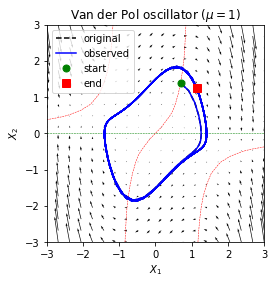

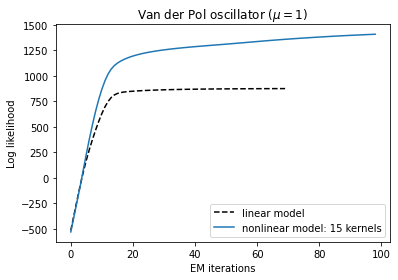

### Linear model
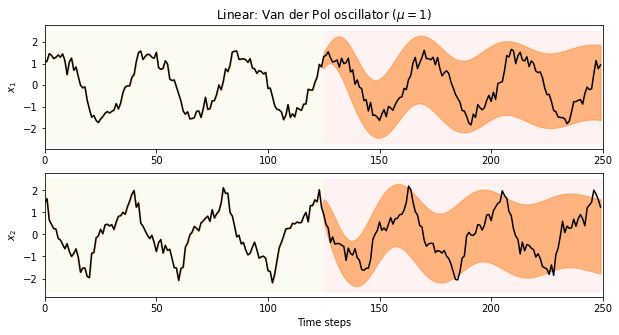
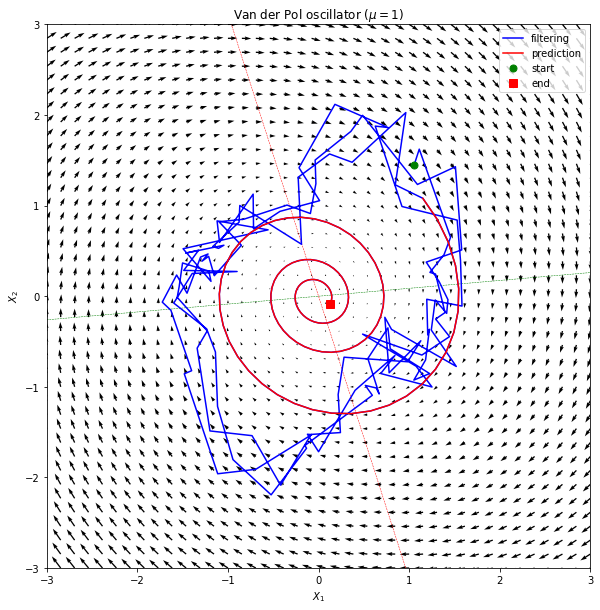

### RBF state model
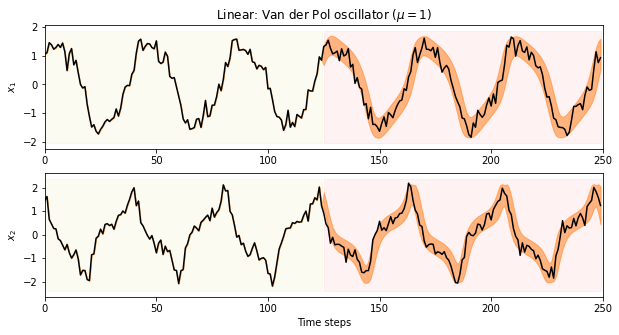 
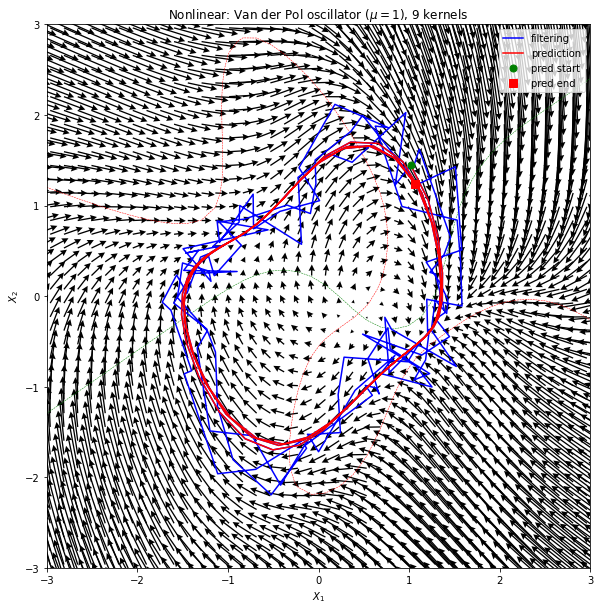

# Side note: Computational performance

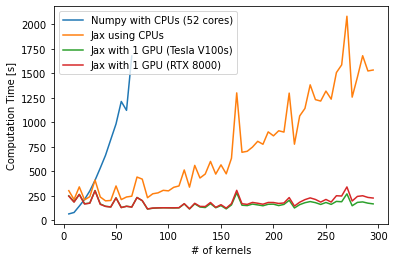

# A heteroscedastic observation model

(work with Natasha \& Guillaume)

$$
p(\by\vert\bx) = \frac{1}{Z(\bx)}\exp\left(-\frac{1}{2}(\by-\bmu(\bx))^\top\Sigma(\bx)^{-1} (\by-\bmu(\bx)) \right)
$$

__Cosh covariance__:
$$
\bmu(\bx) = M\bx+b,
$$
$$
\Sigma(\bx) = \sigma^2\mathbf{I} + UD(\bx)U^\top = \sigma^2\mathbf{I} + \sum_{i=1}^{d_u}\mathbf{u}_iD_i(\bx)\mathbf{u}_i^\top,
$$

with $D(\bx)={\rm diag}\left(\text{NN}_{\rm cosh}(\bx)\right)$ and $U^\top U=\mathbf{I}$.

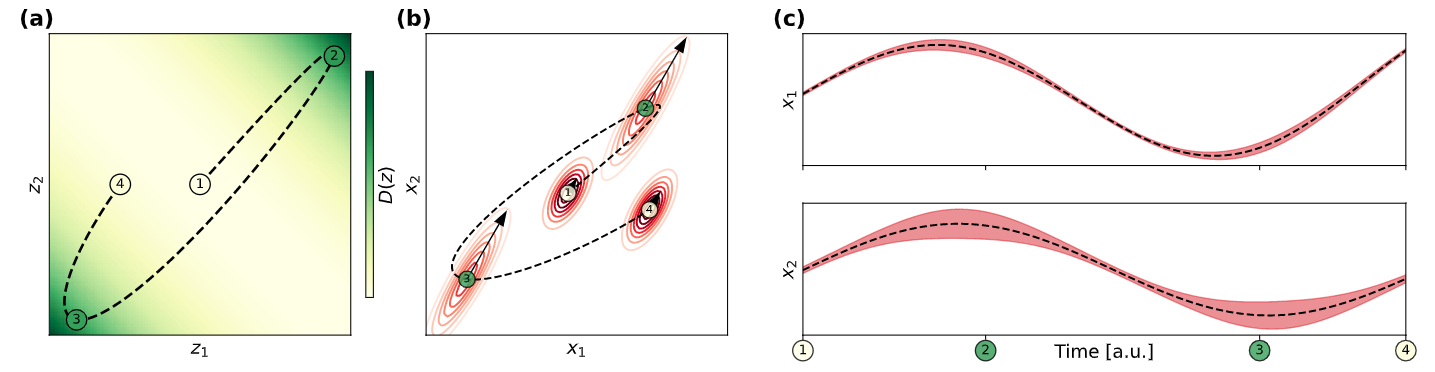

In [46]:
from timeseries_jax import observation_models, state_models, ssm_em

Dz = 2
Dx = X.shape[1]
Du = 1

om = observation_models.HCCovObservationModel(Dx=Dx, Dz=Dz, Du=Du, noise_x=.001)
om.W = 2 * objax.random.normal(om.W.shape)
om.beta =  .01 * objax.random.normal(om.beta.shape) ** 2
om.update_emission_density()
sm = state_models.LinearStateModel(Dz=Dz, noise_z=.1)

ssm = ssm_em.StateSpaceEM(X, om, sm)

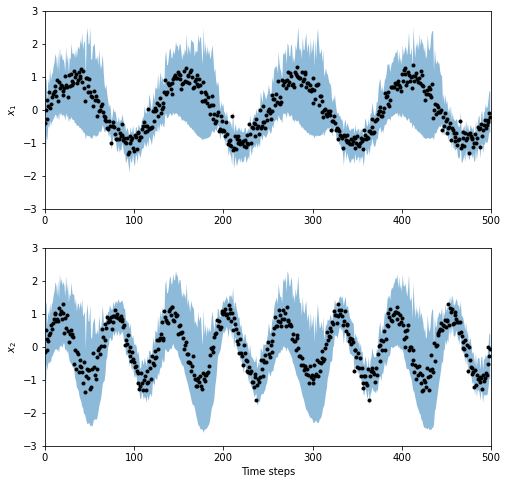

In [47]:
ssm.forward_path()
p_x = ssm.compute_data_density()
mean_estimate = p_x.mu
std_estimate = 2 * jnp.sqrt(p_x.Sigma.diagonal(axis1=1, axis2=2))

plt.figure(figsize=(8,8))
ax1 = plt.subplot(211)
plt.plot(X[:,0], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,0] - std_estimate[1:,0], mean_estimate[1:,0] + std_estimate[1:,0], alpha=.5)
plt.xlim([0,500])
plt.ylim([-3,3])
plt.ylabel('$x_1$')
plt.subplot(212, sharex=ax1)
plt.plot(X[:,1], 'k.')
plt.fill_between(range(1,T), mean_estimate[1:,1] - std_estimate[1:,1], mean_estimate[1:,1] + std_estimate[1:,1], 
                    alpha=.5)
plt.xlabel('Time steps')
plt.ylabel('$x_2$')
plt.ylim([-3,3])
plt.show()

# Learning the parameters

Let's check the Q-function:
$$
    Q(w,w^{\rm old}) = \sum_{t=1}^T\underline{\EE_{p(z_t\vert x_{1:T}, w^{\rm old})}\left[\ln \color{blue}{p(x_t\vert z_{t})}\right]} + \sum_{t=1}^T\EE_{p(z_{t-1:t}\vert x_{1:T}, w^{\rm old})}\left[\ln \color{red}{p(z_t\vert z_{t-1})}\right] + \EE_{p(z_0\vert x_{1:T}, w^{\rm old})}\left[\ln p(z_0)\right].
$$

Observation model part:
$$
\EE_{p(z_t\vert x_{1:T}, w^{\rm old})}\left[\ln \color{blue}{p(x_t\vert z_{t})}\right] = \EE_{p(z_{t}\vert x_{1:T}, w^{\rm old})}\left[-\frac{1}{2}\left(x_{t} - \bmu_{\rm lin}(z_{t})\right)^\top \underline{(Q_z(z_t))^{-1}}\left( z_{t} - \bmu_{\rm lin}(z_{t-1})\right) - \frac{1}{2}\ln\underline{\vert Q_z(z_t)}\vert \right] + {\rm const.}
$$

### Problematic terms
Matrix determinant lemma:
$$
\ln \vert Q_{\rm x}(z)\vert = (d_x-d_u)\ln \sigma^2 + \sum_{i=1}^{d_u} \ln (\sigma^2 + D_i(z)) \geq (d_x-d_u)\ln \sigma^2 + \sum_{i=1}^{d_u} [\text{$2^{nd}$ order polynomial in $z$}]
$$
Woodbury matrix inversion:
$$
(Q_x(z))^{-1} = \sigma^{-2}\mathbf{I}_{d_x} - \sigma^{-2}\sum_{i=1}^{d_u}\mathbf{u}_i \frac{D_i(z)}{\sigma^2 + D_i(z)} \mathbf{u}_i^\top \geq \sigma^{-2}\mathbf{I}_{d_x} - \sigma^{-2}\sum_{i=1}^{d_u}\mathbf{u}_i D_i(z)e^{-[\text{$2^{nd}$ order polynomial in $z$}]}\mathbf{u}_i^\top
$$

Note, that our ```integrate()``` function again becomes handy!

Hence, we can evaluate the (lower bounded) Q-function (and its gradients) &rarr; we can learn the model.

# Results: Synthetic dataset

![image.png](../figs/aistats22/synthetic.png)

# Results: Real world dataset

![image.png](../figs/aistats22/energy.png)

# Summary and outlook

Gaussian toolbox allows for
+ easy manipulation of Gaussians
+ Integration with respect to Gaussians
+ Easy intergration of NNs into the Gaussian framework

This features can be used for inference in standard probabilistic models like
+ Regression or Kalman Filter (and Smoother)

Using approximate affine transformation allows approximate inference of complex time-series models.
+ Modular framework that is easy to extend with new models.

### Potential extensions

+ DAS Student currently implementing _Gaussian processes_.
+ Look into generative models: $p(\by|\bx)$ is always invertable given a $p(\bx)$ indenpendent of what the dimensions of $\bx$ and $\by$ are.
+ Look into _expectation propagation_ and _belief propagation_.



# Thanks a lot for your patience!

<img src="images/gauss.jpeg" width="400" height="100">

# Let's have lunch?